<a href="https://colab.research.google.com/github/evelynmmartinez/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales
- Author: Evelyn Martinez

## Project Overview

## Loading Data

In [76]:
#Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [77]:

fname = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week01/Data/sales_predictions_2023.csv"
df_sales_pred = pd.read_csv(fname)

In [78]:
df_sales_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Cleaning Data

In [79]:
# Renaming the columns so it's easier to read

rename_dict = {"Item_Identifier":"Item Identifier",
               "Item_Weight": "Item Weight",
               "Item_Fat_Content": "Item Fat Content",
               "Item_Visibility": "Item Visibility",
               "Item_Type":"Item Type",
               "Item_MRP" :"Item MRP",
               "Outlet_Identifier" : "Outlet Identifier",
               "Outlet_Establishment_Year": "Outlet Establishment Year",
               "Outlet_Size" : "Outlet Size",
               "Outlet_Location_Type" : "Outlet Location Type",
               "Outlet_Type" : "Outlet Type",
               "Item_Outlet_Sales" : "Item Outlet Sales"}

rename_dict

{'Item_Identifier': 'Item Identifier',
 'Item_Weight': 'Item Weight',
 'Item_Fat_Content': 'Item Fat Content',
 'Item_Visibility': 'Item Visibility',
 'Item_Type': 'Item Type',
 'Item_MRP': 'Item MRP',
 'Outlet_Identifier': 'Outlet Identifier',
 'Outlet_Establishment_Year': 'Outlet Establishment Year',
 'Outlet_Size': 'Outlet Size',
 'Outlet_Location_Type': 'Outlet Location Type',
 'Outlet_Type': 'Outlet Type',
 'Item_Outlet_Sales': 'Item Outlet Sales'}

In [80]:
df_sales_pred = df_sales_pred.rename(rename_dict,axis=1)
df_sales_pred.head()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [81]:
#How many rows and columns
df_sales_pred.shape

(8523, 12)

In [82]:
#2) What are the datatypes of each variable?
df_sales_pred.dtypes

Item Identifier               object
Item Weight                  float64
Item Fat Content              object
Item Visibility              float64
Item Type                     object
Item MRP                     float64
Outlet Identifier             object
Outlet Establishment Year      int64
Outlet Size                   object
Outlet Location Type          object
Outlet Type                   object
Item Outlet Sales            float64
dtype: object

In [83]:
#3) Are there duplicates? If so, drop any duplicates.

duplicated_rows = df_sales_pred.duplicated()
duplicated_rows



0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [84]:
df_sales_pred.duplicated().sum()

0

In [85]:
#4) Identify missing values.
df_sales_pred.isna()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,True,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [86]:
null_sums = df_sales_pred.isna().sum()
null_sums

Item Identifier                 0
Item Weight                  1463
Item Fat Content                0
Item Visibility                 0
Item Type                       0
Item MRP                        0
Outlet Identifier               0
Outlet Establishment Year       0
Outlet Size                  2410
Outlet Location Type            0
Outlet Type                     0
Item Outlet Sales               0
dtype: int64

In [87]:
null_percent = null_sums/len(df_sales_pred) * 100
null_percent

Item Identifier               0.000000
Item Weight                  17.165317
Item Fat Content              0.000000
Item Visibility               0.000000
Item Type                     0.000000
Item MRP                      0.000000
Outlet Identifier             0.000000
Outlet Establishment Year     0.000000
Outlet Size                  28.276428
Outlet Location Type          0.000000
Outlet Type                   0.000000
Item Outlet Sales             0.000000
dtype: float64

In [88]:
null_percent[null_percent>0] #Percentage of miissing items in the entire data set.

Item Weight    17.165317
Outlet Size    28.276428
dtype: float64

In [89]:
# 5) Address the missing values by using a placeholder value.
df_sales_pred['Item Weight'] = df_sales_pred['Item Weight'].fillna('MISSING')
df_sales_pred['Item Weight'].value_counts(dropna=False)

MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item Weight, Length: 416, dtype: int64

In [90]:
df_sales_pred['Outlet Size'] = df_sales_pred['Outlet Size'].fillna('MISSING')
df_sales_pred['Outlet Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet Size, dtype: int64

In [91]:
df_sales_pred.isna()

,Item Identifier,Item Weight,Item Fat Content,Item Visibility,Item Type,Item MRP,Outlet Identifier,Outlet Establishment Year,Outlet Size,Outlet Location Type,Outlet Type,Item Outlet Sales
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,False,False,False,False,False,False,False,False,False,False,False,False
8519,False,False,False,False,False,False,False,False,False,False,False,False
8520,False,False,False,False,False,False,False,False,False,False,False,False
8521,False,False,False,False,False,False,False,False,False,False,False,False


In [92]:
# 6) Confirm that there are no missing values after addressing them.
df_sales_pred.isna().sum()

Item Identifier              0
Item Weight                  0
Item Fat Content             0
Item Visibility              0
Item Type                    0
Item MRP                     0
Outlet Identifier            0
Outlet Establishment Year    0
Outlet Size                  0
Outlet Location Type         0
Outlet Type                  0
Item Outlet Sales            0
dtype: int64

In [93]:
#7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
obj_columns = df_sales_pred.select_dtypes("object").columns
obj_columns

Index(['Item Identifier', 'Item Weight', 'Item Fat Content', 'Item Type',
       'Outlet Identifier', 'Outlet Size', 'Outlet Location Type',
       'Outlet Type'],
      dtype='object')

## Clean Data

In [94]:
for col in obj_columns:
  print(f"Value Counts for {col}")
  print(df_sales_pred[col].value_counts())
  print('\n')

Value Counts for Item Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item Identifier, Length: 1559, dtype: int64


Value Counts for Item Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: Item Weight, Length: 416, dtype: int64


Value Counts for Item Fat Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item Fat Content, dtype: int64


Value Counts for Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks          

In [95]:
# Standardize the values in the Central column
df_sales_pred['Item Fat Content'] = df_sales_pred['Item Fat Content'].replace({'LF':"Low Fat", "reg":"Regular", "low fat":"Low Fat"})
df_sales_pred['Item Fat Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item Fat Content, dtype: int64

In [96]:
_#8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
num_cols = df_sales_pred.select_dtypes('number').columns
num_cols

Index(['Item Visibility', 'Item MRP', 'Outlet Establishment Year',
       'Item Outlet Sales'],
      dtype='object')

In [97]:

# We use the .describe() method without explicitly listing the numerical columns because
# pandas only performs numerical calculations and statistics on numerical columns

df_sales_pred.describe()

,Item Visibility,Item MRP,Outlet Establishment Year,Item Outlet Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,140.992782,1997.831867,2181.288914
std,0.051598,62.275067,8.371760,1706.499616
min,0.000000,31.290000,1985.000000,33.290000
25%,0.026989,93.826500,1987.000000,834.247400
50%,0.053931,143.012800,1999.000000,1794.331000
75%,0.094585,185.643700,2004.000000,3101.296400
max,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

### Histogram of numerical Features

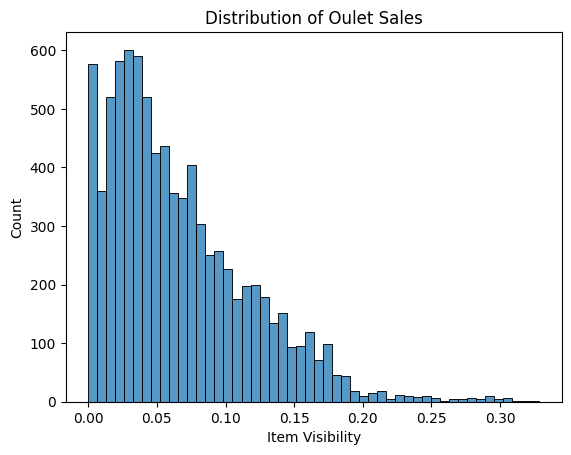

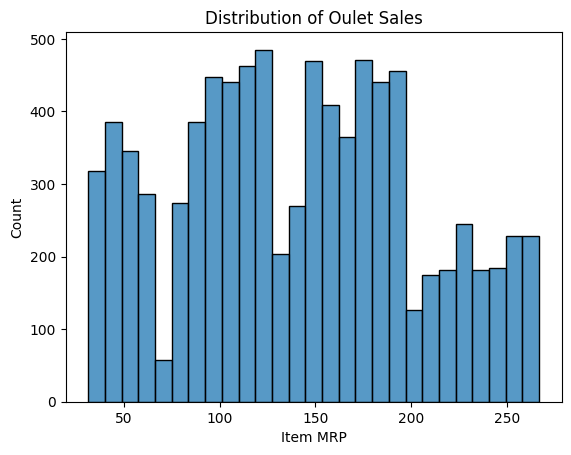

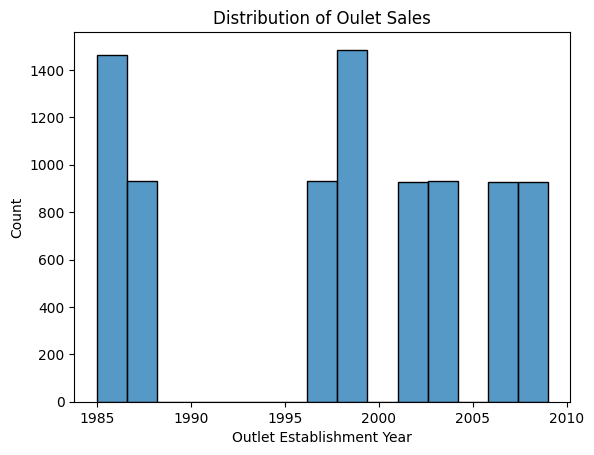

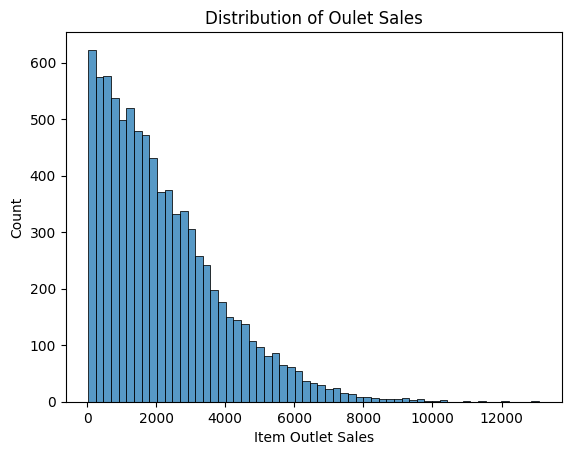

In [98]:
num_cols = df_sales_pred.select_dtypes(include='number')

for column in num_cols.columns:
    plt.figure()
    sns.histplot(data=num_cols,
                 x=column),


    plt.title(f"Distribution of Oulet Sales")
    plt.xlabel(column)
    plt.ylabel("Count");


###Box plot of Numerical Figures

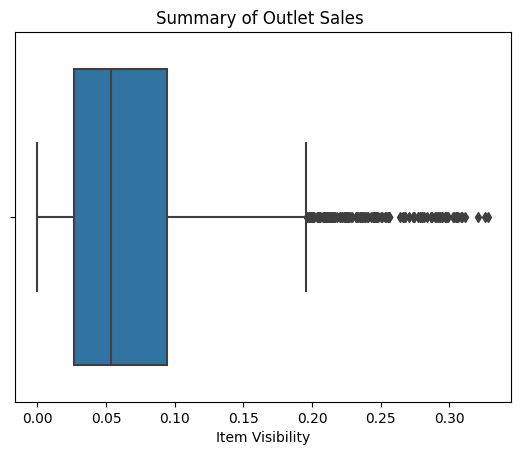

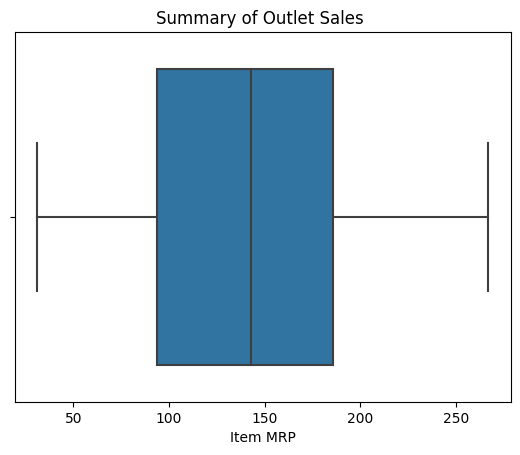

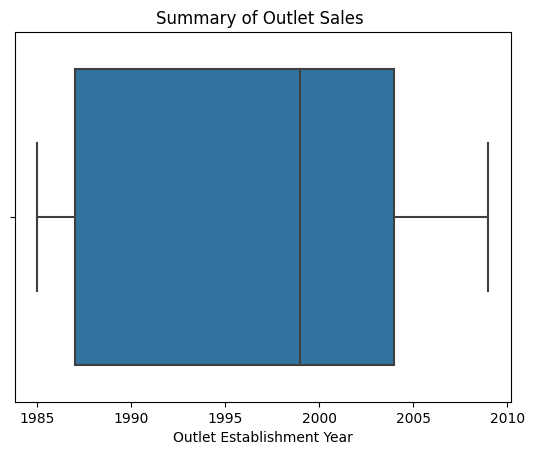

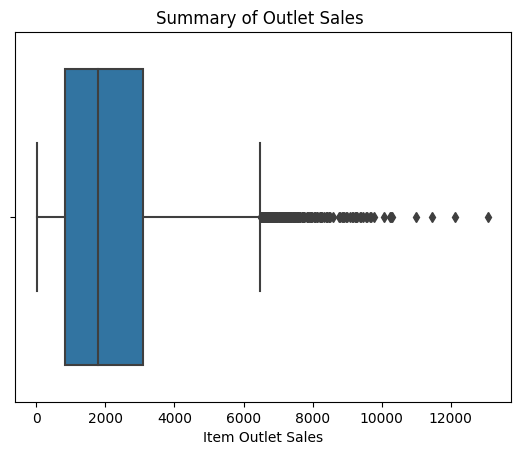

In [99]:
num_cols = df_sales_pred.select_dtypes(include='number')

for column in num_cols.columns:
    plt.figure()
    sns.boxplot(data=num_cols,
                x= column)

    plt.title(f"Summary of Outlet Sales ")
    plt.xlabel(column)


##Countplot in Categotical Feautures

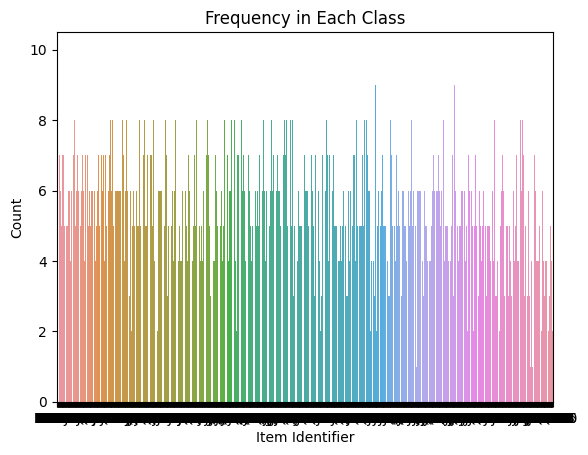

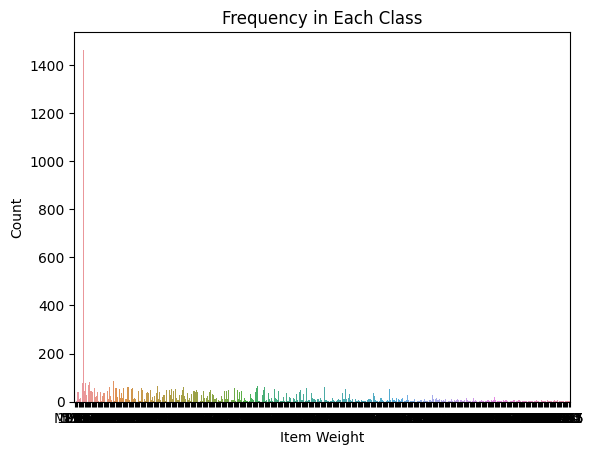

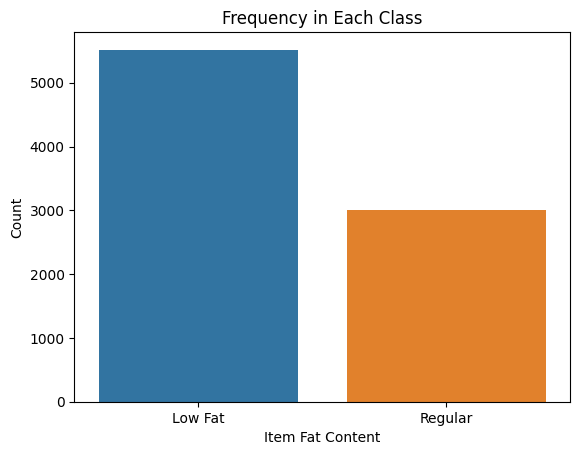

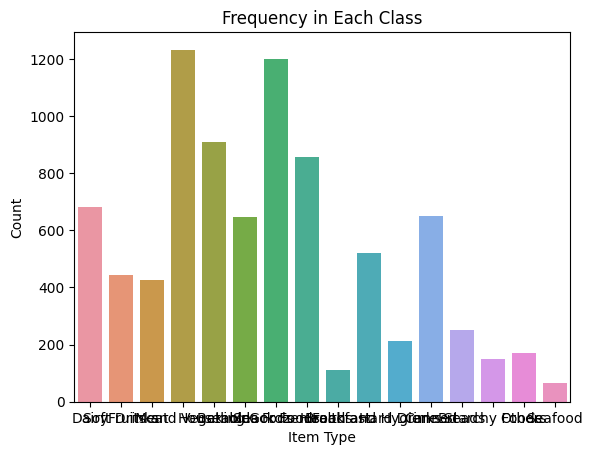

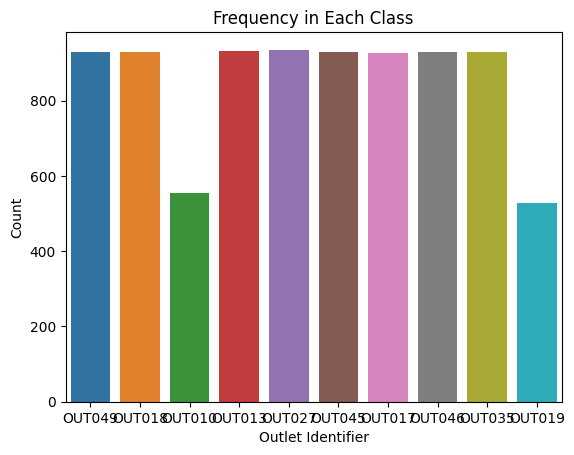

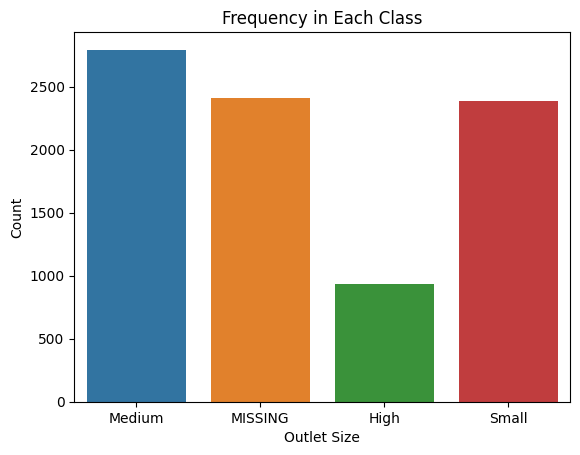

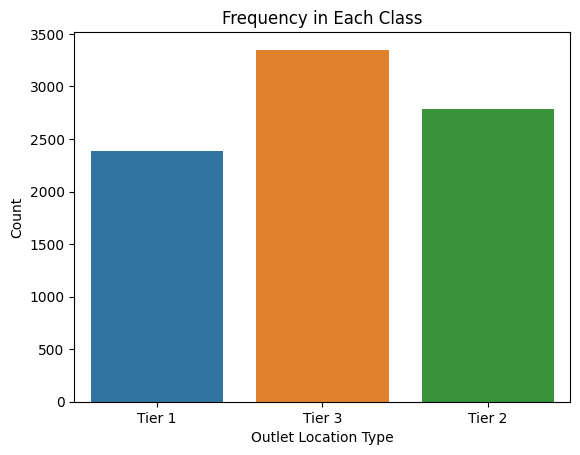

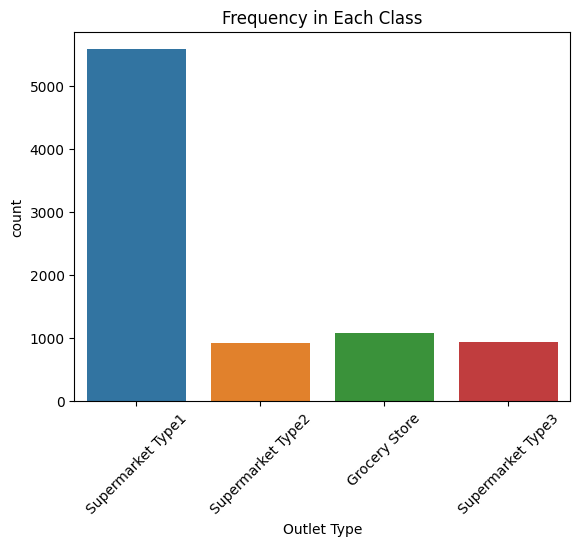

In [104]:
obj_columns = df_sales_pred.select_dtypes("object").columns

for column in obj_columns:
    plt.figure()
    sns.countplot(data=df_sales_pred,
                x= column)


    plt.title(f"Frequency in Each Class")
    plt.xlabel(column)
    plt.ylabel("Count")

countplot = sns.countplot(data=df_sales_pred, x=column)
if column == 'Outlet Type':
   countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)
if column == 'Outlet Identifier':
   countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)
if column == 'Item Type':
   countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)
if column == 'Item Weight':
   countplot.set_xticklabels(countplot.get_xticklabels(), rotation=45)


##Correlation Heatmap in Categorical Feautures

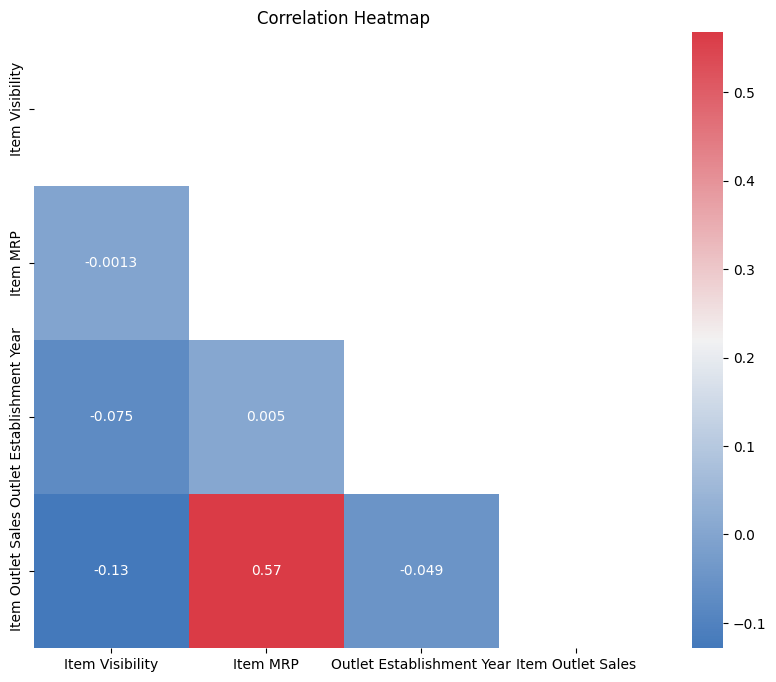

In [101]:
corr = df_sales_pred.corr()
mask = np.triu(np.ones_like(corr))
cmap = sns.diverging_palette(250, 10, as_cmap=True)

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, cmap=cmap, annot=True, mask=mask)


plt.title("Correlation Heatmap");


## Feature Inspection